# Analysis
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [6]:
!date

Tue Jan  9 13:53:38 EST 2018


In [9]:
%matplotlib notebook

### Data

In [1]:
data_name = 't_surf'
years = range(1,121)
ncfiles0 = [f'/tigress/agms/FLOR/work/Control-1860_tigerx86_64.intel16_512PE/POSTP/{i:04d}0101.atmos_month.nc' for i in years]
ncfiles = [f'/tigress/gvecchi/MODEL_OUT/Control-1990_tigerx86_64.intel16_512PE/POSTP/{i:04d}0101.atmos_month.nc' for i in years]

In [2]:
ds0 = xr.open_mfdataset(ncfiles0).rename({'grid_xt': 'lon', 'grid_yt':'lat'})
ds0['time'] = [datetime.datetime(*t.replace(year=t.year+2000).timetuple()[0:6]) for t in ds0['time'].values]
ds = xr.open_mfdataset(ncfiles).rename({'grid_xt': 'lon', 'grid_yt':'lat'})
ds['time'] = [datetime.datetime(*t.replace(year=t.year+2000).timetuple()[0:6]) for t in ds['time'].values]

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [3]:
ts = ds[data_name].geo.fldmean().load()
ts0 = ds0[data_name].geo.fldmean().load()

### Plot

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


<IPython.core.display.Javascript object>


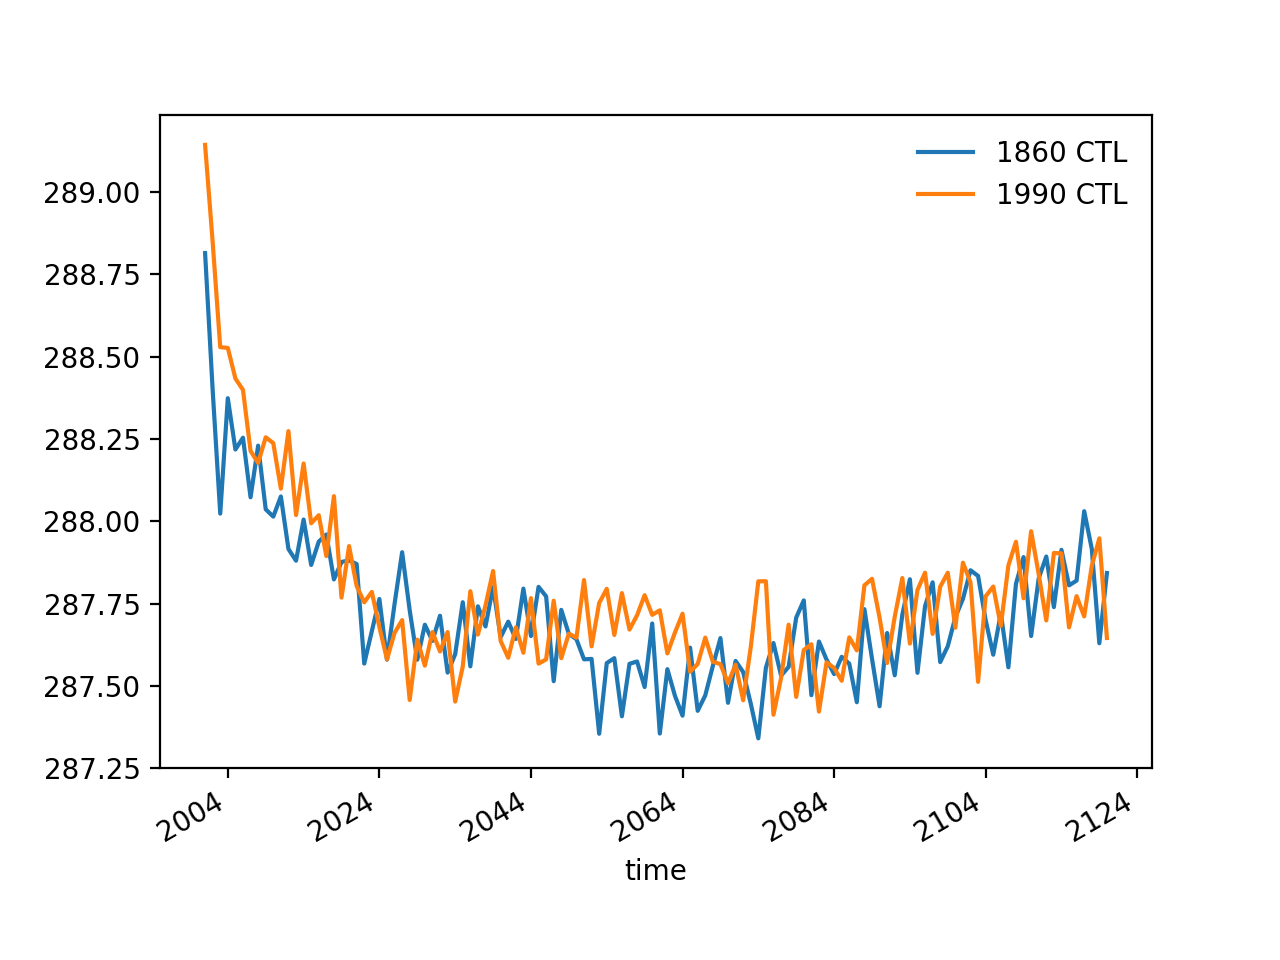

In [11]:
ts0.resample(time='AS').mean('time').plot(label='1860 CTL')
ts.resample(time='AS').mean('time').plot(label='1990 CTL')
plt.legend()